# 6.0.2 Categorical Variables Analysis

## Contents List:

1. Import Visualization Libraries and Data
2. Exploring Categorical Variables
3. Cross Referencing Categorical Variables

## 1. Import Visualization Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import statsmodels.api as sm
from scipy.stats import chi2_contingency
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

In [3]:
# define path
path = r'/Users/carolinelasersohn/Documents/Documents - Caroline’s MacBook Pro/data analytics/Immersion/Section 6/Final Project 6'

In [4]:
# import data set "dairy_wrangled.csv"
df = pd.read_csv(os.path.join(path, '02 Data','Prepared Data', 'dairy_wrangled.csv'))
data = pd.read_csv(os.path.join(path, '02 Data','Prepared Data', 'dairy_wrangled.csv'))

In [5]:
data.shape

(4325, 23)

In [6]:
df.shape

(4325, 23)

In [7]:
print(df.dtypes)

Unnamed: 0                               int64
Location                                object
Total Land Area (acres)                float64
Number of Cows                           int64
Farm Size                               object
Date                                    object
Product Name                            object
Brand                                   object
Quantity (liters/kg)                   float64
Price per Unit                         float64
Total Value                            float64
Shelf Life (days)                        int64
Storage Condition                       object
Production Date                         object
Expiration Date                         object
Quantity Sold (liters/kg)                int64
Price per Unit (sold)                  float64
Approx. Total Revenue(INR)             float64
Customer Location                       object
Sales Channel                           object
Quantity in Stock (liters/kg)            int64
Minimum Stock

## 2. Exploring Categorical Variables

In [8]:
# Create a DataFrame with only categorical / object columns
categorical_df = df.select_dtypes(include=['object', 'category'])

In [9]:
print(categorical_df.dtypes)

Location             object
Farm Size            object
Date                 object
Product Name         object
Brand                object
Storage Condition    object
Production Date      object
Expiration Date      object
Customer Location    object
Sales Channel        object
dtype: object


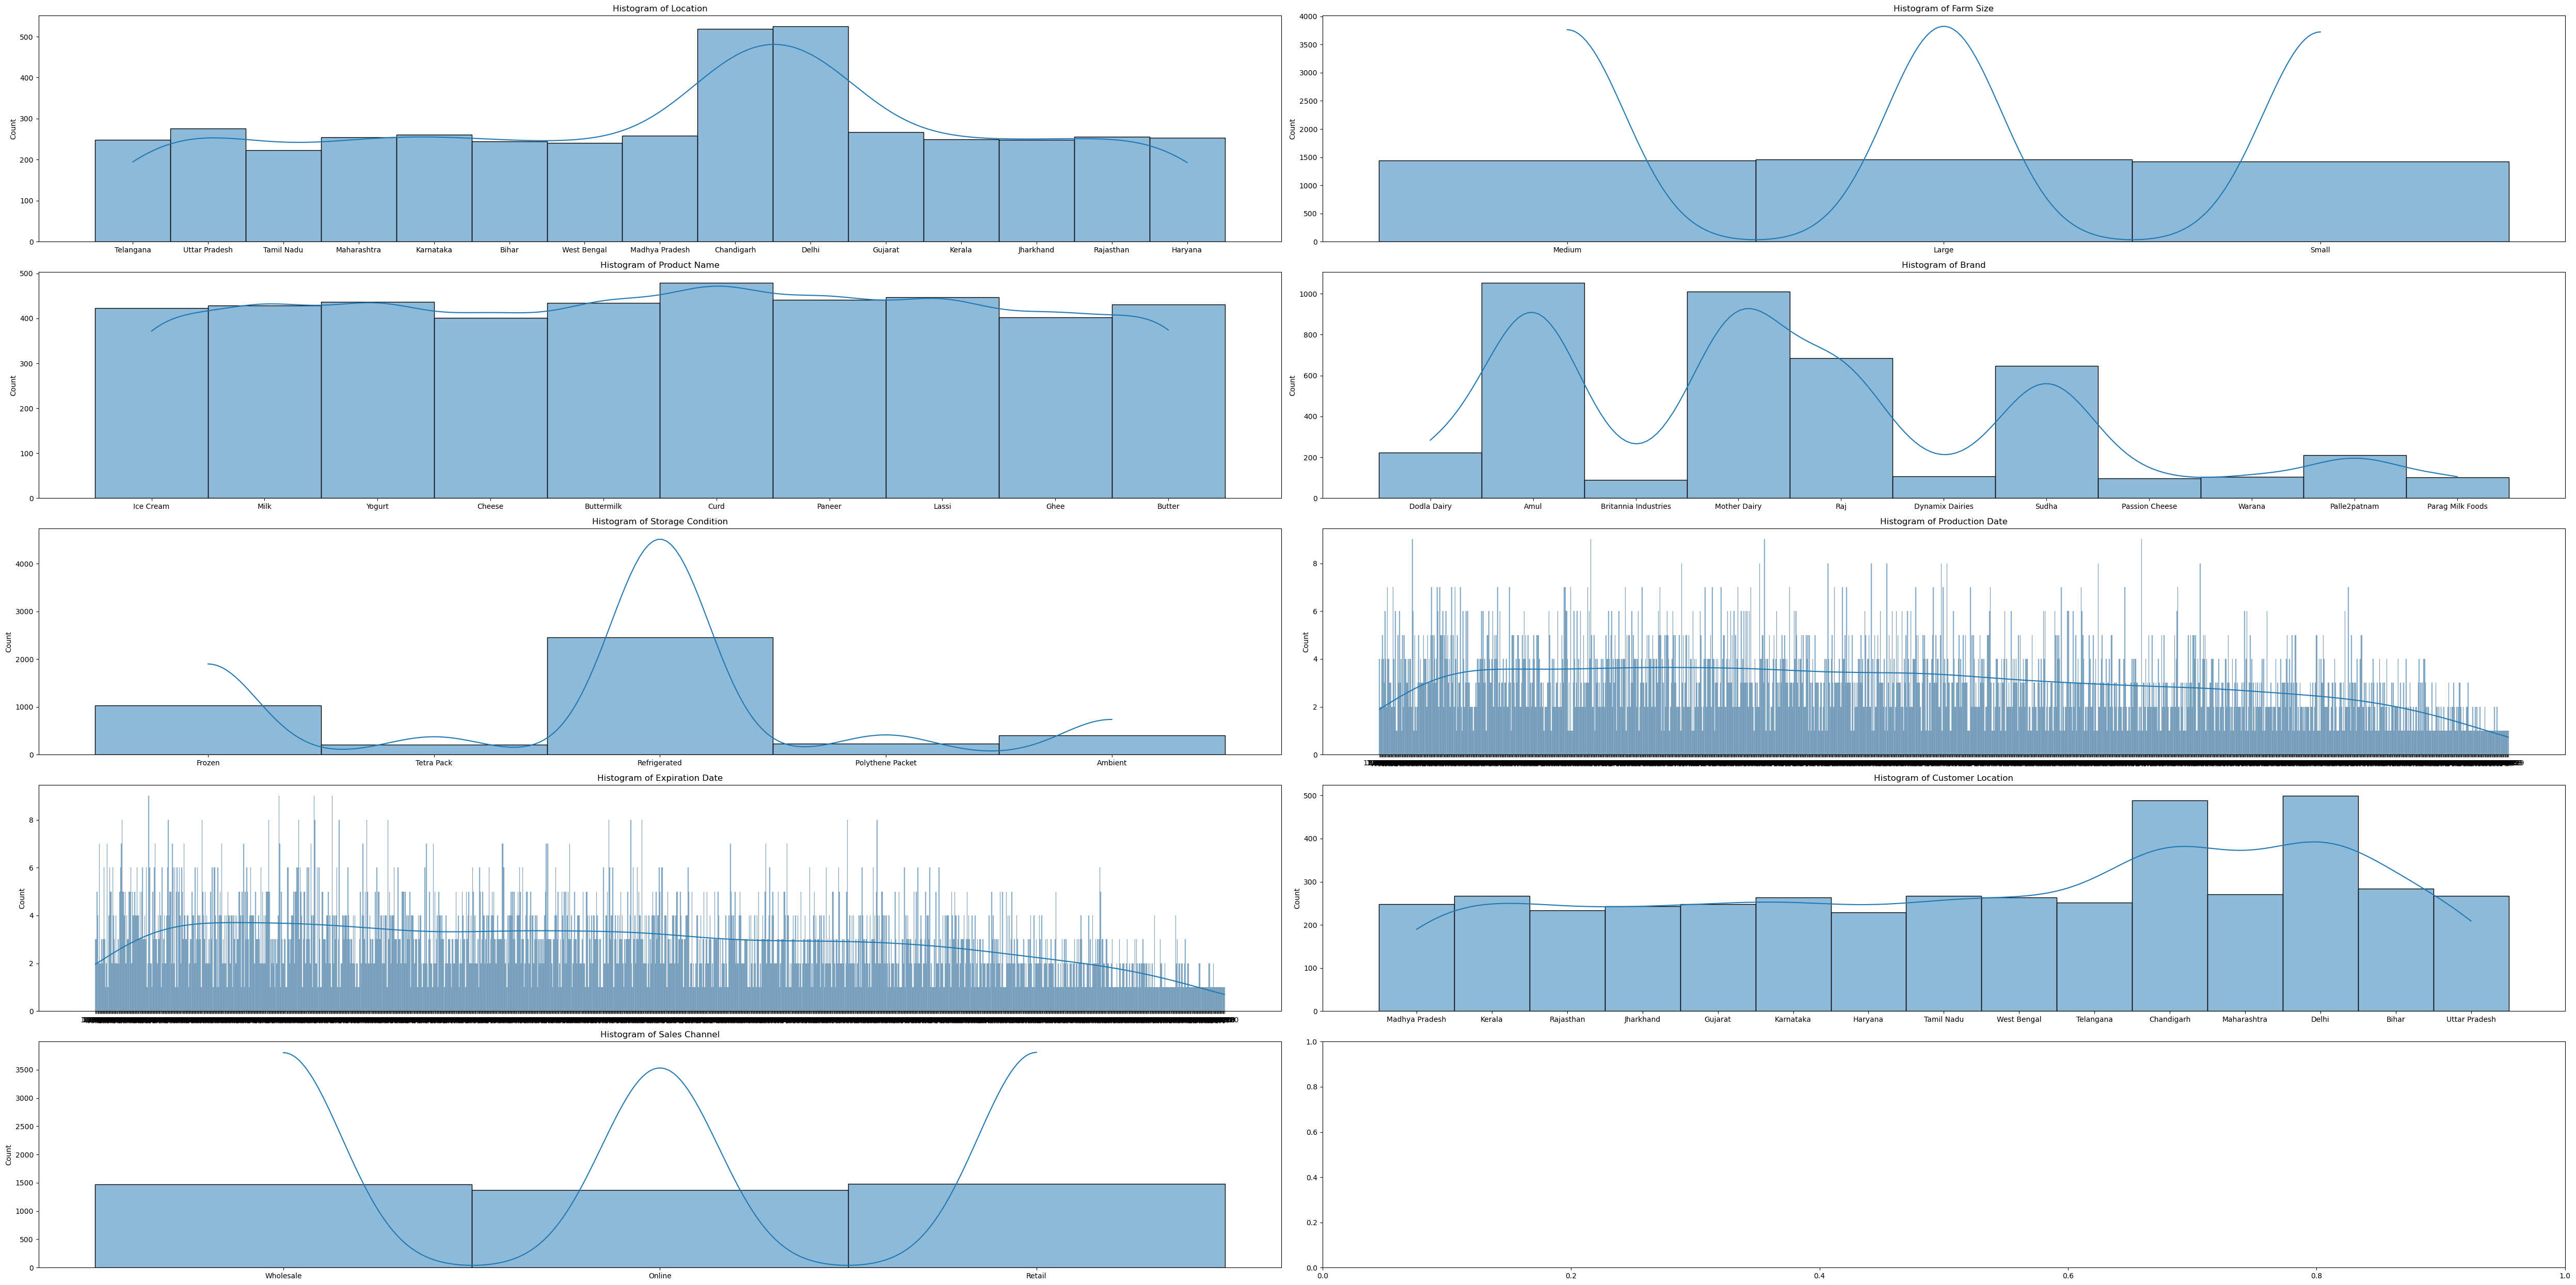

In [10]:
# Set up the plotting area
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(50, 25))

# List of columns to plot
columns_to_plot = [
    'Location', 'Farm Size', 'Product Name', 'Brand', 'Storage Condition', 'Production Date', 'Expiration Date', 'Customer Location', 'Sales Channel'
]

# Generate histograms and box plots
for i, column in enumerate(columns_to_plot):
    sns.histplot(df[column], kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Histogram of {column}')
    axes[i//2, i%2].set_xlabel('') 
    
plt.tight_layout()
plt.show()

### Location

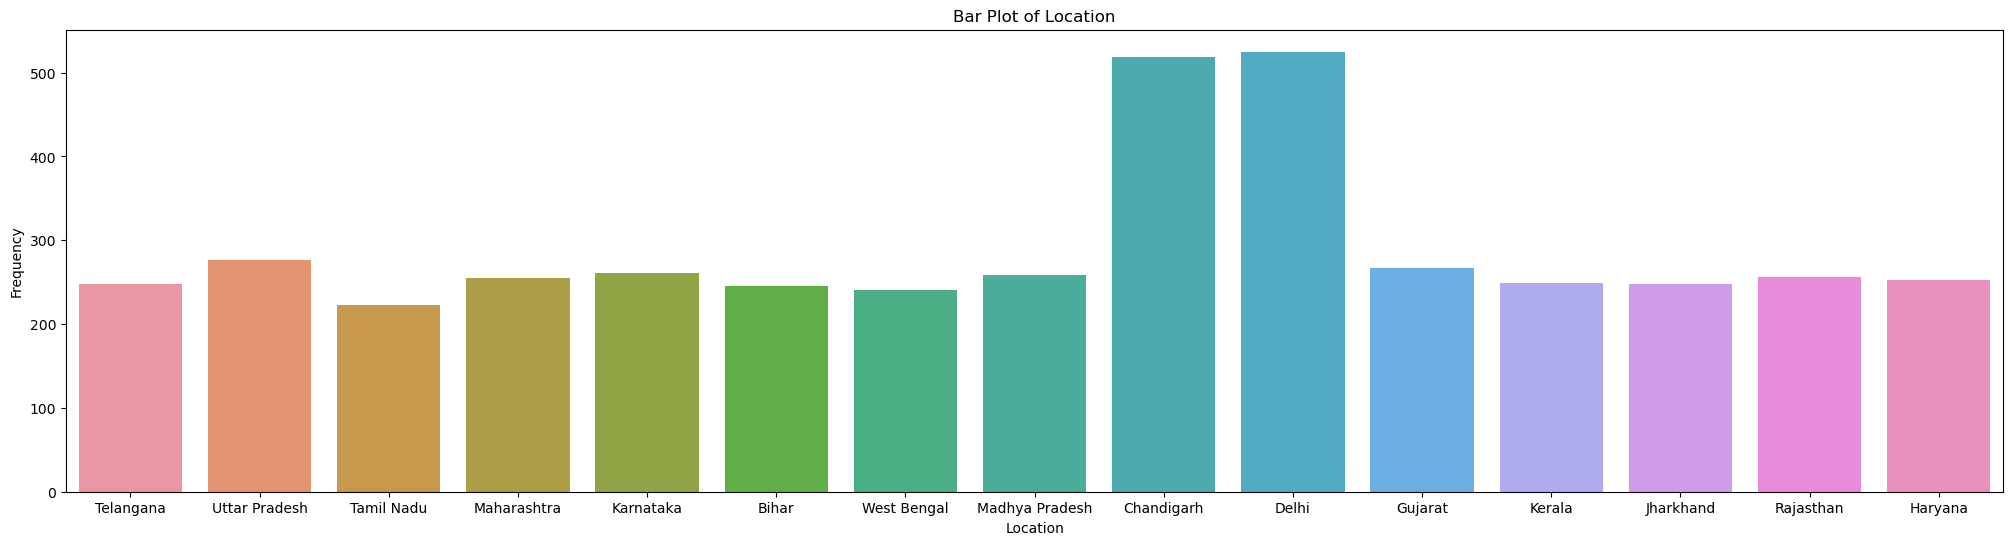

In [11]:
# Column to plot: Location
column_to_plot = 'Location'

# Generate bar plot (equivalent to histogram for categorical data)
plt.figure(figsize=(25, 6))
sns.countplot(x=df[column_to_plot])
plt.title(f'Bar Plot of {column_to_plot}')
plt.xlabel(column_to_plot)
plt.ylabel('Frequency')
plt.show()

In [12]:
# Select the location column to analyze
categorical_column = 'Location'

# Function to get basic stats for a categorical column
def categorical_stats(df, column):
    stats = {
        'unique_values': df[column].nunique(),
        'mode': df[column].mode()[0],
        'value_counts': df[column].value_counts().to_dict()
    }
    return stats

# Get basic stats for the specified categorical column
categorical_statistics = categorical_stats(df, categorical_column)

# Display the basic stats for the categorical column
print(f"Column: {categorical_column}")
print(f"Unique values: {categorical_statistics['unique_values']}")
print(f"Mode: {categorical_statistics['mode']}")
print(f"Value counts:")
for value, count in categorical_statistics['value_counts'].items():
    print(f"  {value}: {count}")

Column: Location
Unique values: 15
Mode: Delhi
Value counts:
  Delhi: 525
  Chandigarh: 519
  Uttar Pradesh: 276
  Gujarat: 267
  Karnataka: 261
  Madhya Pradesh: 259
  Rajasthan: 256
  Maharashtra: 255
  Haryana: 253
  Kerala: 249
  Telangana: 248
  Jharkhand: 248
  Bihar: 245
  West Bengal: 241
  Tamil Nadu: 223


### Customer Location

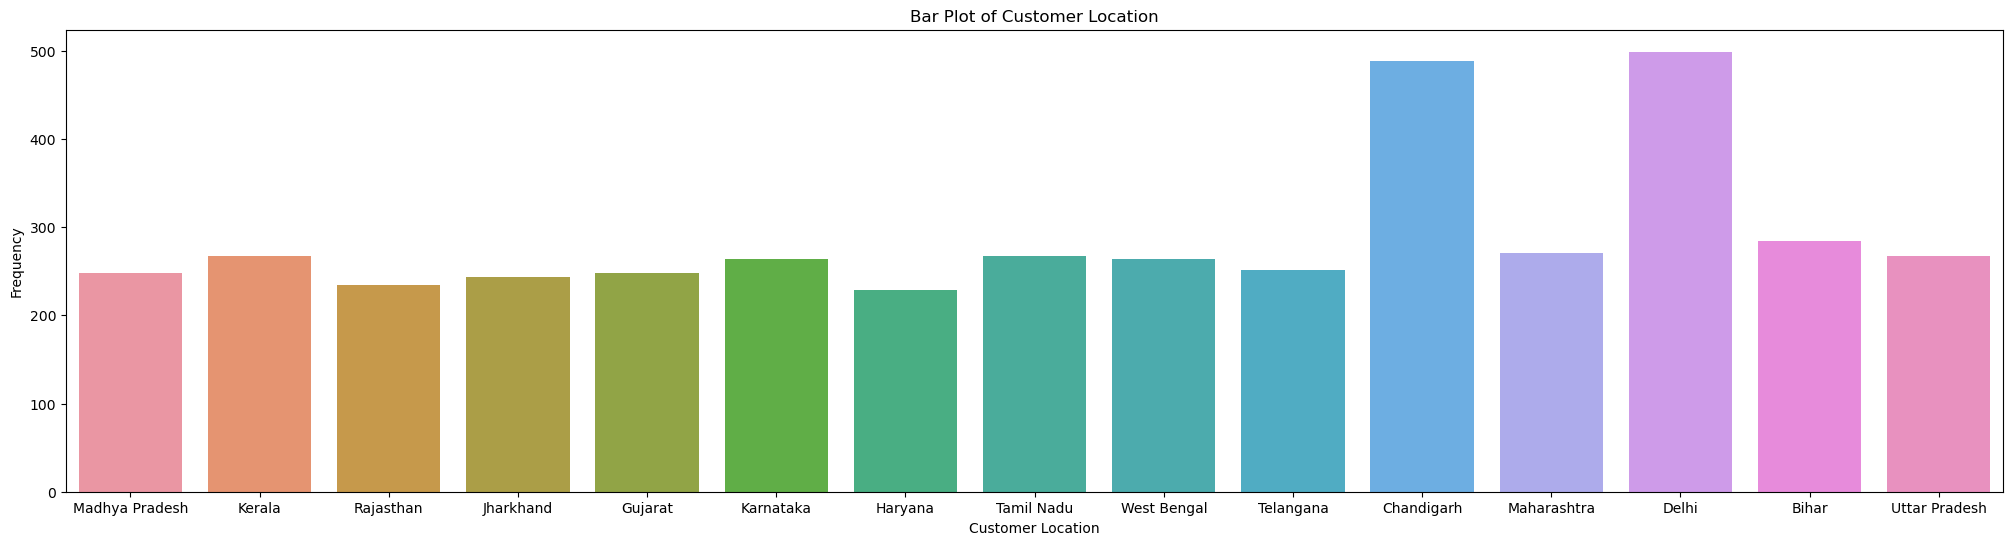

In [13]:
# Column to plot: Customer Location
column_to_plot = 'Customer Location'

# Generate bar plot (equivalent to histogram for categorical data)
plt.figure(figsize=(25, 6))
sns.countplot(x=df[column_to_plot])
plt.title(f'Bar Plot of {column_to_plot}')
plt.xlabel(column_to_plot)
plt.ylabel('Frequency')
plt.show()

In [14]:
# Select the customer location column to analyze
categorical_column = 'Customer Location'

# Function to get basic stats for a categorical column
def categorical_stats(df, column):
    stats = {
        'unique_values': df[column].nunique(),
        'mode': df[column].mode()[0],
        'value_counts': df[column].value_counts().to_dict()
    }
    return stats

# Get basic stats for the specified categorical column
categorical_statistics = categorical_stats(df, categorical_column)

# Display the basic stats for the categorical column
print(f"Column: {categorical_column}")
print(f"Unique values: {categorical_statistics['unique_values']}")
print(f"Mode: {categorical_statistics['mode']}")
print(f"Value counts:")
for value, count in categorical_statistics['value_counts'].items():
    print(f"  {value}: {count}")

Column: Customer Location
Unique values: 15
Mode: Delhi
Value counts:
  Delhi: 499
  Chandigarh: 489
  Bihar: 284
  Maharashtra: 271
  Kerala: 267
  Tamil Nadu: 267
  Uttar Pradesh: 267
  Karnataka: 264
  West Bengal: 264
  Telangana: 251
  Madhya Pradesh: 248
  Gujarat: 248
  Jharkhand: 243
  Rajasthan: 234
  Haryana: 229


### Farm Size

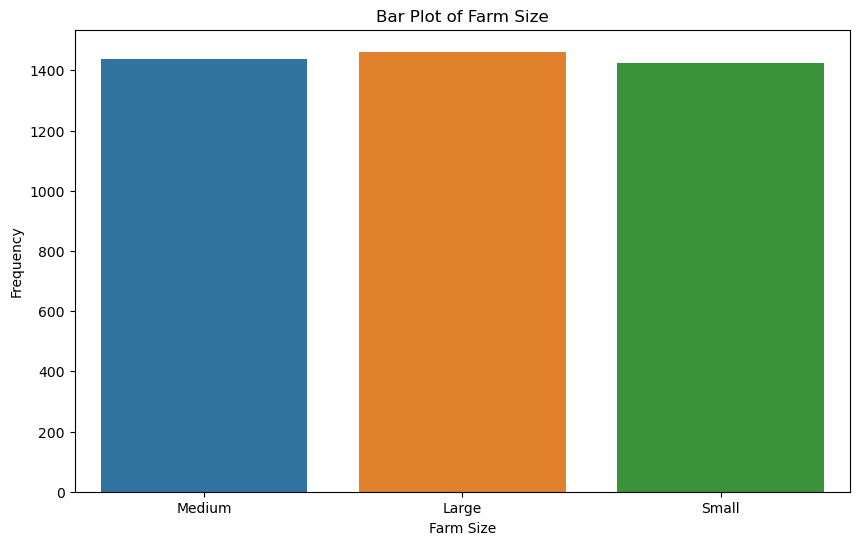

In [15]:
# Column to plot: Farm Size
column_to_plot = 'Farm Size'

# Generate bar plot (equivalent to histogram for categorical data)
plt.figure(figsize=(10, 6))
sns.countplot(x=df[column_to_plot])
plt.title(f'Bar Plot of {column_to_plot}')
plt.xlabel(column_to_plot)
plt.ylabel('Frequency')
plt.show()

In [16]:
# Select the farm size column to analyze
categorical_column = 'Farm Size'

# Function to get basic stats for a categorical column
def categorical_stats(df, column):
    stats = {
        'unique_values': df[column].nunique(),
        'mode': df[column].mode()[0],
        'value_counts': df[column].value_counts().to_dict()
    }
    return stats

# Get basic stats for the specified categorical column
categorical_statistics = categorical_stats(df, categorical_column)

# Display the basic stats for the categorical column
print(f"Column: {categorical_column}")
print(f"Unique values: {categorical_statistics['unique_values']}")
print(f"Mode: {categorical_statistics['mode']}")
print(f"Value counts:")
for value, count in categorical_statistics['value_counts'].items():
    print(f"  {value}: {count}")

Column: Farm Size
Unique values: 3
Mode: Large
Value counts:
  Large: 1462
  Medium: 1439
  Small: 1424


### Product Name

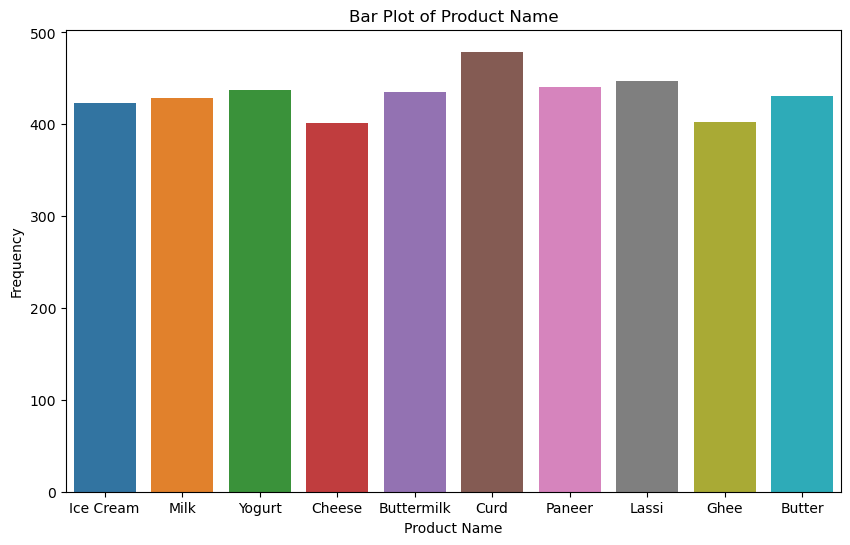

In [17]:
# Column to plot: Product Name
column_to_plot = 'Product Name'

# Generate bar plot (equivalent to histogram for categorical data)
plt.figure(figsize=(10, 6))
sns.countplot(x=df[column_to_plot])
plt.title(f'Bar Plot of {column_to_plot}')
plt.xlabel(column_to_plot)
plt.ylabel('Frequency')
plt.show()

In [18]:
# Select the product column to analyze
categorical_column = 'Product Name'

# Function to get basic stats for a categorical column
def categorical_stats(df, column):
    stats = {
        'unique_values': df[column].nunique(),
        'mode': df[column].mode()[0],
        'value_counts': df[column].value_counts().to_dict()
    }
    return stats

# Get basic stats for the specified categorical column
categorical_statistics = categorical_stats(df, categorical_column)

# Display the basic stats for the categorical column
print(f"Column: {categorical_column}")
print(f"Unique values: {categorical_statistics['unique_values']}")
print(f"Mode: {categorical_statistics['mode']}")
print(f"Value counts:")
for value, count in categorical_statistics['value_counts'].items():
    print(f"  {value}: {count}")

Column: Product Name
Unique values: 10
Mode: Curd
Value counts:
  Curd: 479
  Lassi: 447
  Paneer: 441
  Yogurt: 437
  Buttermilk: 435
  Butter: 431
  Milk: 429
  Ice Cream: 423
  Ghee: 402
  Cheese: 401


### Brand

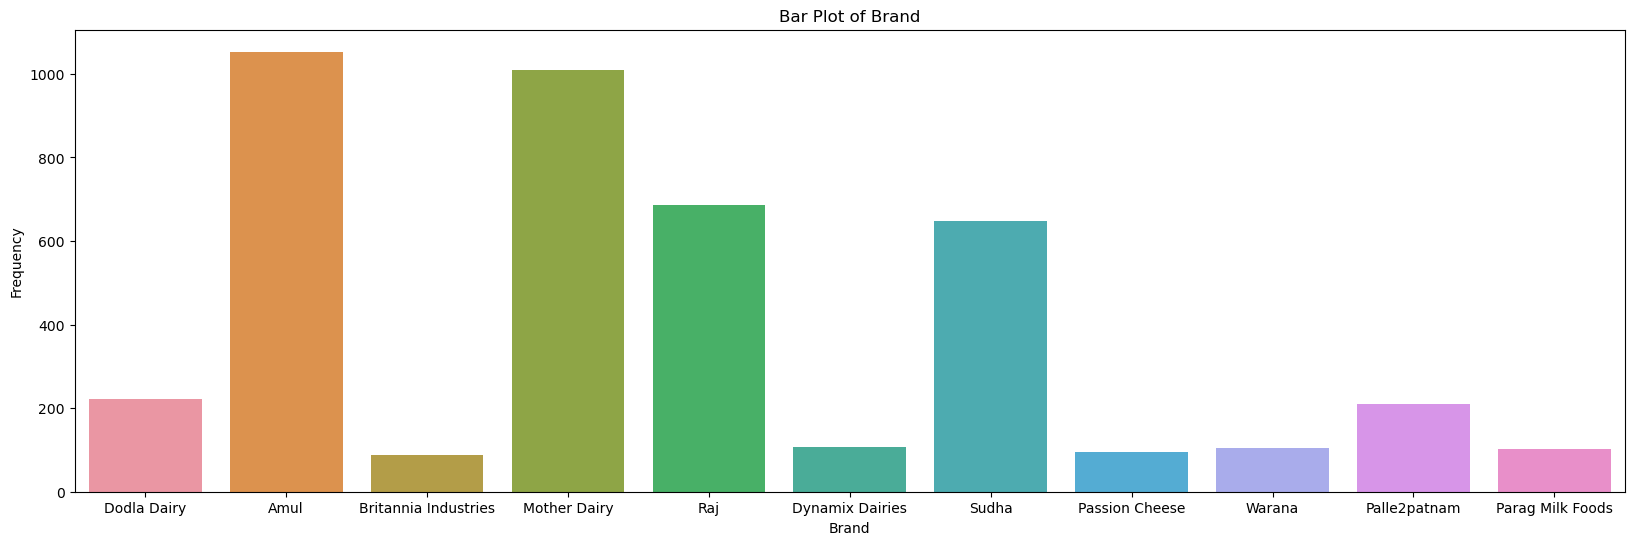

In [19]:
# Column to plot: Brand
column_to_plot = 'Brand'

# Generate bar plot (equivalent to histogram for categorical data)
plt.figure(figsize=(20, 6))
sns.countplot(x=df[column_to_plot])
plt.title(f'Bar Plot of {column_to_plot}')
plt.xlabel(column_to_plot)
plt.ylabel('Frequency')
plt.show()

In [20]:
# Select the brand column to analyze
categorical_column = 'Brand'

# Function to get basic stats for a categorical column
def categorical_stats(df, column):
    stats = {
        'unique_values': df[column].nunique(),
        'mode': df[column].mode()[0],
        'value_counts': df[column].value_counts().to_dict()
    }
    return stats

# Get basic stats for the specified categorical column
categorical_statistics = categorical_stats(df, categorical_column)

# Display the basic stats for the categorical column
print(f"Column: {categorical_column}")
print(f"Unique values: {categorical_statistics['unique_values']}")
print(f"Mode: {categorical_statistics['mode']}")
print(f"Value counts:")
for value, count in categorical_statistics['value_counts'].items():
    print(f"  {value}: {count}")

Column: Brand
Unique values: 11
Mode: Amul
Value counts:
  Amul: 1053
  Mother Dairy: 1010
  Raj: 685
  Sudha: 648
  Dodla Dairy: 222
  Palle2patnam: 211
  Dynamix Dairies: 106
  Warana: 104
  Parag Milk Foods: 102
  Passion Cheese: 96
  Britannia Industries: 88


### Storage Condition

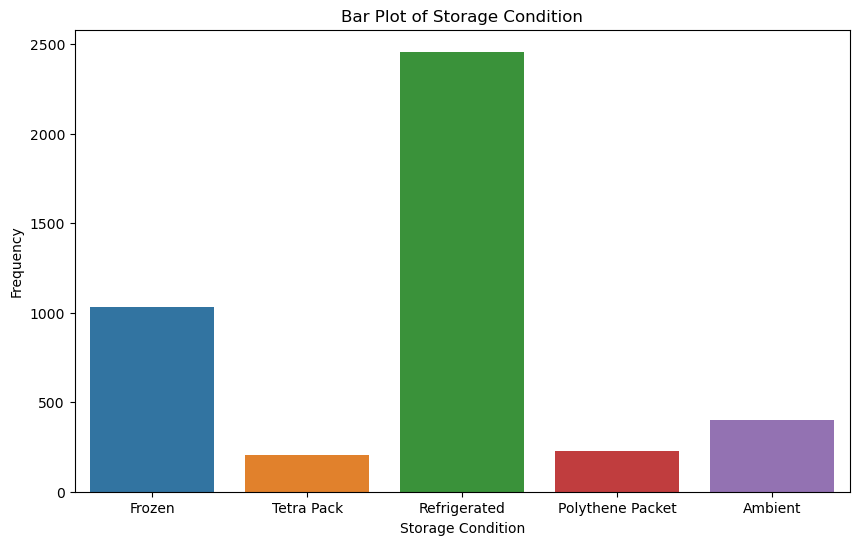

In [21]:
# Column to plot: Storage Condition
column_to_plot = 'Storage Condition'

# Generate bar plot (equivalent to histogram for categorical data)
plt.figure(figsize=(10, 6))
sns.countplot(x=df[column_to_plot])
plt.title(f'Bar Plot of {column_to_plot}')
plt.xlabel(column_to_plot)
plt.ylabel('Frequency')
plt.show()

In [22]:
# Select the storage condition column to analyze
categorical_column = 'Storage Condition'

# Function to get basic stats for a categorical column
def categorical_stats(df, column):
    stats = {
        'unique_values': df[column].nunique(),
        'mode': df[column].mode()[0],
        'value_counts': df[column].value_counts().to_dict()
    }
    return stats

# Get basic stats for the specified categorical column
categorical_statistics = categorical_stats(df, categorical_column)

# Display the basic stats for the categorical column
print(f"Column: {categorical_column}")
print(f"Unique values: {categorical_statistics['unique_values']}")
print(f"Mode: {categorical_statistics['mode']}")
print(f"Value counts:")
for value, count in categorical_statistics['value_counts'].items():
    print(f"  {value}: {count}")

Column: Storage Condition
Unique values: 5
Mode: Refrigerated
Value counts:
  Refrigerated: 2459
  Frozen: 1035
  Ambient: 402
  Polythene Packet: 225
  Tetra Pack: 204


### Sales Channel

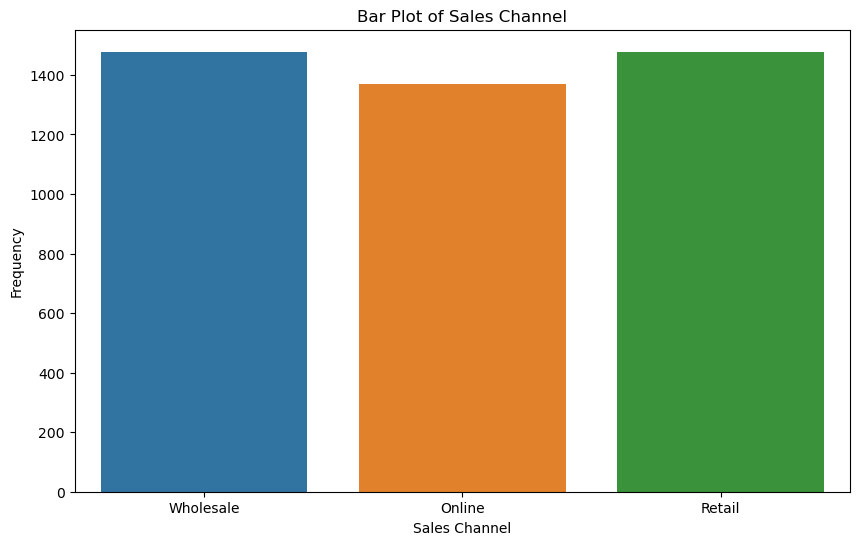

In [23]:
# Column to plot: Sales Channel
column_to_plot = 'Sales Channel'

# Generate bar plot (equivalent to histogram for categorical data)
plt.figure(figsize=(10, 6))
sns.countplot(x=df[column_to_plot])
plt.title(f'Bar Plot of {column_to_plot}')
plt.xlabel(column_to_plot)
plt.ylabel('Frequency')
plt.show()

In [24]:
# Select the sales channel column to analyze
categorical_column = 'Sales Channel'

# Function to get basic stats for a categorical column
def categorical_stats(df, column):
    stats = {
        'unique_values': df[column].nunique(),
        'mode': df[column].mode()[0],
        'value_counts': df[column].value_counts().to_dict()
    }
    return stats

# Get basic stats for the specified categorical column
categorical_statistics = categorical_stats(df, categorical_column)

# Display the basic stats for the categorical column
print(f"Column: {categorical_column}")
print(f"Unique values: {categorical_statistics['unique_values']}")
print(f"Mode: {categorical_statistics['mode']}")
print(f"Value counts:")
for value, count in categorical_statistics['value_counts'].items():
    print(f"  {value}: {count}")

Column: Sales Channel
Unique values: 3
Mode: Retail
Value counts:
  Retail: 1478
  Wholesale: 1476
  Online: 1371


## 3) Cross Referencing Categorical Variables

### Most popular location for each...

In [25]:
# Customer Location
# Group by 'Customer Location' and 'Location', and count occurrences
location_counts = df.groupby(['Customer Location', 'Location']).size().reset_index(name='Count')

# Identify the location with the highest count for each customer location
most_popular_location = location_counts.loc[location_counts.groupby('Customer Location')['Count'].idxmax()]

# Print the most popular location for each customer location
print(most_popular_location)

    Customer Location    Location  Count
2               Bihar       Delhi     47
16         Chandigarh  Chandigarh     60
32              Delhi       Delhi     60
47            Gujarat       Delhi     32
62            Haryana       Delhi     29
76          Jharkhand  Chandigarh     28
91          Karnataka  Chandigarh     36
106            Kerala  Chandigarh     34
122    Madhya Pradesh       Delhi     29
136       Maharashtra  Chandigarh     39
151         Rajasthan  Chandigarh     27
167        Tamil Nadu       Delhi     38
181         Telangana  Chandigarh     31
197     Uttar Pradesh       Delhi     38
211       West Bengal  Chandigarh     29


In [26]:
# Farm Size

# Group by 'Farm Size' and 'Location', and count occurrences
location_counts = df.groupby(['Farm Size', 'Location']).size().reset_index(name='Count')

# Identify the location with the highest count for each farm size
most_popular_location = location_counts.loc[location_counts.groupby('Farm Size')['Count'].idxmax()]

# Print the most popular location for each farm size
print(most_popular_location)

   Farm Size    Location  Count
2      Large       Delhi    171
17    Medium       Delhi    186
31     Small  Chandigarh    177


In [27]:
# Product Name

# Group by 'Product Name' and 'Location', and count occurrences
location_counts = df.groupby(['Product Name', 'Location']).size().reset_index(name='Count')

# Identify the location with the highest count for each product name
most_popular_location = location_counts.loc[location_counts.groupby('Product Name')['Count'].idxmax()]

# Print the most popular location for each product name
print(most_popular_location)

    Product Name    Location  Count
1         Butter  Chandigarh     61
17    Buttermilk       Delhi     54
32        Cheese       Delhi     48
46          Curd  Chandigarh     57
62          Ghee       Delhi     50
77     Ice Cream       Delhi     55
91         Lassi  Chandigarh     67
107         Milk       Delhi     54
122       Paneer       Delhi     51
137       Yogurt       Delhi     53


In [28]:
# Brand

# Group by 'Brand' and 'Location', and count occurrences
location_counts = df.groupby(['Brand', 'Location']).size().reset_index(name='Count')

# Identify the location with the highest count for each brand
most_popular_location = location_counts.loc[location_counts.groupby('Brand')['Count'].idxmax()]

# Print the most popular location for each brand
print(most_popular_location)

                    Brand    Location  Count
2                    Amul       Delhi    129
25   Britannia Industries   Rajasthan     10
31            Dodla Dairy  Chandigarh     30
47        Dynamix Dairies       Delhi     16
62           Mother Dairy       Delhi    127
77           Palle2patnam       Delhi     32
92       Parag Milk Foods       Delhi     14
106        Passion Cheese  Chandigarh     13
122                   Raj       Delhi     78
136                 Sudha  Chandigarh     79
151                Warana  Chandigarh     18


In [29]:
# Storage Condition

# Group by 'Storage Condition' and 'Location', and count occurrences
location_counts = df.groupby(['Storage Condition', 'Location']).size().reset_index(name='Count')

# Identify the location with the highest count for each storage condition
most_popular_location = location_counts.loc[location_counts.groupby('Storage Condition')['Count'].idxmax()]

# Print the most popular location for each storage condition
print(most_popular_location)

   Storage Condition    Location  Count
2            Ambient       Delhi     50
17            Frozen       Delhi    141
32  Polythene Packet       Delhi     27
46      Refrigerated  Chandigarh    306
62        Tetra Pack       Delhi     27


In [30]:
# Sales Channel

# Group by 'Sales Channel' and 'Location', and count occurrences
location_counts = df.groupby(['Sales Channel', 'Location']).size().reset_index(name='Count')

# Identify the location with the highest count for each sales channel
most_popular_location = location_counts.loc[location_counts.groupby('Sales Channel')['Count'].idxmax()]

# Print the most popular location for each sales channel
print(most_popular_location)

   Sales Channel    Location  Count
1         Online  Chandigarh    165
17        Retail       Delhi    193
32     Wholesale       Delhi    176


### Most popular customer location for each...

In [31]:
# Location

# Group by 'Location' and 'Customer Location', and count occurrences
customer_location_counts = df.groupby(['Location', 'Customer Location']).size().reset_index(name='Count')

# Identify the customer location with the highest count for each location
most_popular_cl = customer_location_counts.loc[customer_location_counts.groupby('Location')['Count'].idxmax()]

# Print the most popular location for each customer location
print(most_popular_cl)

           Location Customer Location  Count
1             Bihar        Chandigarh     33
16       Chandigarh        Chandigarh     60
31            Delhi        Chandigarh     60
46          Gujarat        Chandigarh     31
62          Haryana             Delhi     31
77        Jharkhand             Delhi     35
91        Karnataka        Chandigarh     34
106          Kerala        Chandigarh     28
122  Madhya Pradesh             Delhi     34
137     Maharashtra             Delhi     33
151       Rajasthan        Chandigarh     29
166      Tamil Nadu        Chandigarh     33
182       Telangana             Delhi     37
197   Uttar Pradesh             Delhi     35
212     West Bengal             Delhi     25


In [32]:
# Farm Size

# Group by 'Farm Size' and 'Customer Location', and count occurrences
customer_location_counts = df.groupby(['Farm Size', 'Customer Location']).size().reset_index(name='Count')

# Identify the customer location with the highest count for farm size
most_popular_cl = customer_location_counts.loc[customer_location_counts.groupby('Farm Size')['Count'].idxmax()]

# Print the most popular customer location for each farm size
print(most_popular_cl)

   Farm Size Customer Location  Count
2      Large             Delhi    165
16    Medium        Chandigarh    161
32     Small             Delhi    177


In [33]:
# Product Name

# Group by 'Product Name' and 'Customer Location', and count occurrences
customer_location_counts = df.groupby(['Product Name', 'Customer Location']).size().reset_index(name='Count')

# Identify the customer location with the highest count for each product name
most_popular_cl = customer_location_counts.loc[customer_location_counts.groupby('Product Name')['Count'].idxmax()]

# Print the most popular customer location for each product name
print(most_popular_cl)

    Product Name Customer Location  Count
2         Butter             Delhi     51
17    Buttermilk             Delhi     52
31        Cheese        Chandigarh     40
47          Curd             Delhi     55
62          Ghee             Delhi     49
77     Ice Cream             Delhi     61
91         Lassi        Chandigarh     56
106         Milk        Chandigarh     49
121       Paneer        Chandigarh     54
136       Yogurt        Chandigarh     56


In [34]:
# Brand

# Group by 'Brand' and 'Customer Location', and count occurrences
customer_location_counts = df.groupby(['Brand', 'Customer Location']).size().reset_index(name='Count')

# Identify the customer location with the highest count for each brand
most_popular_cl = customer_location_counts.loc[customer_location_counts.groupby('Brand')['Count'].idxmax()]

# Print the most popular customer location for each brand
print(most_popular_cl)

                    Brand Customer Location  Count
2                    Amul             Delhi    124
28   Britannia Industries     Uttar Pradesh     11
31            Dodla Dairy        Chandigarh     32
46        Dynamix Dairies        Chandigarh     12
61           Mother Dairy        Chandigarh    116
77           Palle2patnam             Delhi     25
91       Parag Milk Foods        Chandigarh     17
106        Passion Cheese        Chandigarh     17
122                   Raj             Delhi     89
137                 Sudha             Delhi     75
152                Warana             Delhi     14


In [35]:
# Storage Condition

# Group by 'Storage Condition' and 'Customer Location', and count occurrences
customer_location_counts = df.groupby(['Storage Condition', 'Customer Location']).size().reset_index(name='Count')

# Identify the customer location with the highest count for each storage condition
most_popular_cl = customer_location_counts.loc[customer_location_counts.groupby('Storage Condition')['Count'].idxmax()]

# Print the most popular customer location for each storage condition
print(most_popular_cl)

   Storage Condition Customer Location  Count
2            Ambient             Delhi     49
16            Frozen        Chandigarh    126
31  Polythene Packet        Chandigarh     23
47      Refrigerated             Delhi    277
61        Tetra Pack        Chandigarh     26


In [36]:
# Sales Channel

# Group by 'Sales Channel' and 'Customer Location', and count occurrences
customer_location_counts = df.groupby(['Sales Channel', 'Customer Location']).size().reset_index(name='Count')

# Identify the customer location with the highest count for each sales channel
most_popular_cl = customer_location_counts.loc[customer_location_counts.groupby('Sales Channel')['Count'].idxmax()]

# Print the most popular customer location for each sales channel
print(most_popular_cl)

   Sales Channel Customer Location  Count
2         Online             Delhi    187
16        Retail        Chandigarh    174
31     Wholesale        Chandigarh    168


### Most popular farm size for each...

In [37]:
# Location

# Group by 'Location' and 'Farm Size', and count occurrences
farm_size_counts = df.groupby(['Location', 'Farm Size']).size().reset_index(name='Count')

# Identify the farm size with the highest count for each location
most_popular_fs = farm_size_counts.loc[farm_size_counts.groupby('Location')['Count'].idxmax()]

# Print the most popular farm size for each location
print(most_popular_fs)

          Location Farm Size  Count
0            Bihar     Large     91
4       Chandigarh    Medium    181
7            Delhi    Medium    186
10         Gujarat    Medium     93
12         Haryana     Large     86
15       Jharkhand     Large     90
18       Karnataka     Large     92
21          Kerala     Large     89
26  Madhya Pradesh     Small     91
29     Maharashtra     Small     95
30       Rajasthan     Large     94
35      Tamil Nadu     Small     78
38       Telangana     Small     91
40   Uttar Pradesh    Medium     95
44     West Bengal     Small     83


In [38]:
# Customer Location

# Group by 'Customer Location' and 'Farm Size', and count occurrences
farm_size_counts = df.groupby(['Customer Location', 'Farm Size']).size().reset_index(name='Count')

# Identify the farm size with the highest count for each customer location
most_popular_fs = farm_size_counts.loc[farm_size_counts.groupby('Customer Location')['Count'].idxmax()]

# Print the most popular farm size for each customer location
print(most_popular_fs)

   Customer Location Farm Size  Count
1              Bihar    Medium    111
5         Chandigarh     Small    167
8              Delhi     Small    177
11           Gujarat     Small     91
14           Haryana     Small     80
15         Jharkhand     Large     82
18         Karnataka     Large     93
23            Kerala     Small    109
24    Madhya Pradesh     Large     92
27       Maharashtra     Large     95
30         Rajasthan     Large     94
33        Tamil Nadu     Large     95
37         Telangana    Medium     92
39     Uttar Pradesh     Large     93
42       West Bengal     Large     95


In [39]:
# Product Name

# Group by 'Product Name' and 'Farm Size', and count occurrences
farm_size_counts = df.groupby(['Product Name', 'Farm Size']).size().reset_index(name='Count')

# Identify the farm size with the highest count for each product name
most_popular_fs = farm_size_counts.loc[farm_size_counts.groupby('Product Name')['Count'].idxmax()]

# Print the most popular farm size for each product name
print(most_popular_fs)

   Product Name Farm Size  Count
0        Butter     Large    156
3    Buttermilk     Large    153
8        Cheese     Small    153
10         Curd    Medium    168
13         Ghee    Medium    140
16    Ice Cream    Medium    150
18        Lassi     Large    160
21         Milk     Large    154
25       Paneer    Medium    158
27       Yogurt     Large    167


In [40]:
# Brand

# Group by 'Brand' and 'Farm Size', and count occurrences
farm_size_counts = df.groupby(['Brand', 'Farm Size']).size().reset_index(name='Count')

# Identify the farm size with the highest count for each brand
most_popular_fs = farm_size_counts.loc[farm_size_counts.groupby('Brand')['Count'].idxmax()]

# Print the most popular farm size for each brand
print(most_popular_fs)

                   Brand Farm Size  Count
2                   Amul     Small    365
5   Britannia Industries     Small     34
7            Dodla Dairy    Medium     75
11       Dynamix Dairies     Small     45
13          Mother Dairy    Medium    354
16          Palle2patnam    Medium     77
18      Parag Milk Foods     Large     44
21        Passion Cheese     Large     36
26                   Raj     Small    236
27                 Sudha     Large    236
30                Warana     Large     36


In [41]:
# Storage Condition

# Group by 'Storage Condition' and 'Farm Size', and count occurrences
farm_size_counts = df.groupby(['Storage Condition', 'Farm Size']).size().reset_index(name='Count')

# Identify the farm size with the highest count for each storage condition
most_popular_fs = farm_size_counts.loc[farm_size_counts.groupby('Storage Condition')['Count'].idxmax()]

# Print the most popular farm size for each storage condition
print(most_popular_fs)

   Storage Condition Farm Size  Count
1            Ambient    Medium    140
4             Frozen    Medium    348
8   Polythene Packet     Small     86
9       Refrigerated     Large    843
12        Tetra Pack     Large     79


In [42]:
# Sales Channel

# Group by 'Sales Channel' and 'Farm Size', and count occurrences
farm_size_counts = df.groupby(['Sales Channel', 'Farm Size']).size().reset_index(name='Count')

# Identify the farm size with the highest count for each sales channel
most_popular_fs = farm_size_counts.loc[farm_size_counts.groupby('Sales Channel')['Count'].idxmax()]

# Print the most popular farm size for each sales channel
print(most_popular_fs)

  Sales Channel Farm Size  Count
1        Online    Medium    467
3        Retail     Large    536
7     Wholesale    Medium    506


### Most popular product for each...

In [43]:
# Location

# Group by 'Product Name' and 'Location', and count occurrences
product_counts = df.groupby(['Location', 'Product Name']).size().reset_index(name='Count')

# Identify the prodcut with the highest count for each location
most_popular_products = product_counts.loc[product_counts.groupby('Location')['Count'].idxmax()]

# Print the most popular product for each location
print(most_popular_products)

           Location Product Name  Count
1             Bihar   Buttermilk     30
16       Chandigarh        Lassi     67
25            Delhi    Ice Cream     55
33          Gujarat         Curd     37
41          Haryana   Buttermilk     32
57        Jharkhand         Milk     31
68        Karnataka       Paneer     31
75           Kerala    Ice Cream     29
80   Madhya Pradesh       Butter     31
93      Maharashtra         Curd     39
101       Rajasthan   Buttermilk     37
112      Tamil Nadu       Cheese     28
128       Telangana       Paneer     31
130   Uttar Pradesh       Butter     36
149     West Bengal       Yogurt     33


In [44]:
# Customer Location

# Group by 'Product Name' and 'Customer Location', and count occurrences
product_counts = df.groupby(['Customer Location', 'Product Name']).size().reset_index(name='Count')

# Identify the prodcut with the highest count for each customer location
most_popular_products = product_counts.loc[product_counts.groupby('Customer Location')['Count'].idxmax()]

# Print the most popular product for each customer location
print(most_popular_products)

    Customer Location Product Name  Count
9               Bihar       Yogurt     39
16         Chandigarh        Lassi     56
25              Delhi    Ice Cream     61
36            Gujarat        Lassi     31
42            Haryana       Cheese     33
53          Jharkhand         Curd     31
69          Karnataka       Yogurt     33
73             Kerala         Curd     35
89     Madhya Pradesh       Yogurt     35
98        Maharashtra       Paneer     42
100         Rajasthan       Butter     30
111        Tamil Nadu   Buttermilk     34
126         Telangana        Lassi     35
130     Uttar Pradesh       Butter     35
141       West Bengal   Buttermilk     38


In [45]:
# Farm Size

# Group by 'Product Name' and 'Farm Size', and count occurrences
product_counts = df.groupby(['Farm Size', 'Product Name']).size().reset_index(name='Count')

# Identify the prodcut with the highest count for each farm size
most_popular_products = product_counts.loc[product_counts.groupby('Farm Size')['Count'].idxmax()]

# Print the most popular product for each farm size
print(most_popular_products)

   Farm Size Product Name  Count
9      Large       Yogurt    167
13    Medium         Curd    168
23     Small         Curd    160


In [46]:
# Brand

# Group by 'Product Name' and 'Brand', and count occurrences
product_counts = df.groupby(['Brand', 'Product Name']).size().reset_index(name='Count')

# Identify the prodcut with the highest count for each brand
most_popular_products = product_counts.loc[product_counts.groupby('Brand')['Count'].idxmax()]

# Print the most popular product for each brand
print(most_popular_products)

                   Brand Product Name  Count
3                   Amul         Curd    121
10  Britannia Industries       Cheese     88
12           Dodla Dairy       Yogurt    117
13       Dynamix Dairies       Cheese    106
16          Mother Dairy         Curd    119
24          Palle2patnam       Yogurt    111
25      Parag Milk Foods       Butter    102
26        Passion Cheese       Cheese     96
30                   Raj        Lassi    126
34                 Sudha         Curd    120
39                Warana       Butter    104


In [47]:
# Storage Condition

# Group by 'Product Name' and 'Storage Condition', and count occurrences
product_counts = df.groupby(['Storage Condition', 'Product Name']).size().reset_index(name='Count')

# Identify the prodcut with the highest count for each storage condition
most_popular_products = product_counts.loc[product_counts.groupby('Storage Condition')['Count'].idxmax()]

# Print the most popular product for each storage condition
print(most_popular_products)

   Storage Condition Product Name  Count
0            Ambient         Ghee    402
3             Frozen    Ice Cream    423
5   Polythene Packet         Milk    225
9       Refrigerated         Curd    479
13        Tetra Pack         Milk    204


In [48]:
# Sales Channel

# Group by 'Product Name' and 'Sales Channel', and count occurrences
product_counts = df.groupby(['Sales Channel', 'Product Name']).size().reset_index(name='Count')

# Identify the prodcut with the highest count for each sales channel
most_popular_products = product_counts.loc[product_counts.groupby('Sales Channel')['Count'].idxmax()]

# Print the most popular product for each sales channel
print(most_popular_products)

   Sales Channel Product Name  Count
6         Online        Lassi    163
13        Retail         Curd    181
29     Wholesale       Yogurt    159


### Most popular brand for each...

In [49]:
# Location

# Group by 'Brand' and 'Location', and count occurrences
brand_counts = df.groupby(['Location', 'Brand']).size().reset_index(name='Count')

# Identify the brand with the highest count for each location
most_popular_brand = brand_counts.loc[brand_counts.groupby('Location')['Count'].idxmax()]

# Print the most popular brand for each location
print(most_popular_brand)

           Location         Brand  Count
0             Bihar          Amul     63
11       Chandigarh          Amul    127
22            Delhi          Amul    129
37          Gujarat  Mother Dairy     61
44          Haryana          Amul     65
55        Jharkhand          Amul     64
66        Karnataka          Amul     68
77           Kerala          Amul     72
88   Madhya Pradesh          Amul     70
103     Maharashtra  Mother Dairy     69
114       Rajasthan  Mother Dairy     65
121      Tamil Nadu          Amul     51
136       Telangana  Mother Dairy     69
147   Uttar Pradesh  Mother Dairy     64
158     West Bengal  Mother Dairy     67


In [50]:
# Customer Location

# Group by 'Brand' and 'Customer Location', and count occurrences
brand_counts = df.groupby(['Customer Location', 'Brand']).size().reset_index(name='Count')

# Identify the brand with the highest count for each customer location
most_popular_brand = brand_counts.loc[brand_counts.groupby('Customer Location')['Count'].idxmax()]

# Print the most popular brand for each customer location
print(most_popular_brand)

    Customer Location         Brand  Count
0               Bihar          Amul     73
11         Chandigarh          Amul    120
22              Delhi          Amul    124
33            Gujarat          Amul     65
44            Haryana          Amul     62
55          Jharkhand          Amul     61
70          Karnataka  Mother Dairy     71
77             Kerala          Amul     68
92     Madhya Pradesh  Mother Dairy     67
99        Maharashtra          Amul     64
114         Rajasthan  Mother Dairy     58
121        Tamil Nadu          Amul     64
136         Telangana  Mother Dairy     55
143     Uttar Pradesh          Amul     64
158       West Bengal  Mother Dairy     71


In [51]:
# Farm Size

# Group by 'Brand' and 'Farm Size', and count occurrences
brand_counts = df.groupby(['Farm Size', 'Brand']).size().reset_index(name='Count')

# Identify the brand with the highest count for each farm size
most_popular_brand = brand_counts.loc[brand_counts.groupby('Farm Size')['Count'].idxmax()]

# Print the most popular brand for each farm size
print(most_popular_brand)

   Farm Size         Brand  Count
0      Large          Amul    354
15    Medium  Mother Dairy    354
22     Small          Amul    365


In [52]:
# Product Name

# Group by 'Brand' and 'Product Name', and count occurrences
brand_counts = df.groupby(['Product Name', 'Brand']).size().reset_index(name='Count')

# Identify the brand with the highest count for each product name
most_popular_brand = brand_counts.loc[brand_counts.groupby('Product Name')['Count'].idxmax()]

# Print the most popular brand for each prodcut name
print(most_popular_brand)

   Product Name         Brand  Count
1        Butter  Mother Dairy    117
5    Buttermilk  Mother Dairy    118
8        Cheese          Amul    111
12         Curd          Amul    121
17         Ghee  Mother Dairy    104
22    Ice Cream  Mother Dairy    112
26        Lassi           Raj    126
29         Milk  Mother Dairy    117
33       Paneer  Mother Dairy    119
37       Yogurt   Dodla Dairy    117


In [53]:
# Storage Condition

# Group by 'Brand' and 'Storage Condition', and count occurrences
brand_counts = df.groupby(['Storage Condition', 'Brand']).size().reset_index(name='Count')

# Identify the brand with the highest count for each storage condition
most_popular_brand = brand_counts.loc[brand_counts.groupby('Storage Condition')['Count'].idxmax()]

# Print the most popular brand for each storage condition
print(most_popular_brand)

   Storage Condition         Brand  Count
1            Ambient  Mother Dairy    104
4             Frozen          Amul    260
14  Polythene Packet  Mother Dairy     60
17      Refrigerated          Amul    599
29        Tetra Pack  Mother Dairy     57


In [54]:
# Sales Channel

# Group by 'Brand' and 'Sales Channel', and count occurrences
brand_counts = df.groupby(['Sales Channel', 'Brand']).size().reset_index(name='Count')

# Identify the brand with the highest count for each sales channel
most_popular_brand = brand_counts.loc[brand_counts.groupby('Sales Channel')['Count'].idxmax()]

# Print the most popular brand for each sales channel
print(most_popular_brand)

   Sales Channel         Brand  Count
4         Online  Mother Dairy    336
11        Retail          Amul    366
22     Wholesale          Amul    371


### Most popular storage condition for each...

In [55]:
# Location

# Group by 'Storage Condition' and 'Location', and count occurrences
storage_counts = df.groupby(['Location', 'Storage Condition']).size().reset_index(name='Count')

# Identify the storage condition with the highest count for each location
most_popular_storage = storage_counts.loc[storage_counts.groupby('Location')['Count'].idxmax()]

# Print the most popular storage condition for each location
print(most_popular_storage)

          Location Storage Condition  Count
3            Bihar      Refrigerated    154
8       Chandigarh      Refrigerated    306
13           Delhi      Refrigerated    280
18         Gujarat      Refrigerated    149
23         Haryana      Refrigerated    152
28       Jharkhand      Refrigerated    124
33       Karnataka      Refrigerated    144
38          Kerala      Refrigerated    133
43  Madhya Pradesh      Refrigerated    143
48     Maharashtra      Refrigerated    152
53       Rajasthan      Refrigerated    159
58      Tamil Nadu      Refrigerated    119
63       Telangana      Refrigerated    152
68   Uttar Pradesh      Refrigerated    155
73     West Bengal      Refrigerated    137


In [56]:
# Customer Location

# Group by 'Storage Condition' and 'Customer Location', and count occurrences
storage_counts = df.groupby(['Customer Location', 'Storage Condition']).size().reset_index(name='Count')

# Identify the storage condition with the highest count for each customer location
most_popular_storage = storage_counts.loc[storage_counts.groupby('Customer Location')['Count'].idxmax()]

# Print the most popular storage condition for each customer location
print(most_popular_storage)

   Customer Location Storage Condition  Count
3              Bihar      Refrigerated    156
8         Chandigarh      Refrigerated    273
13             Delhi      Refrigerated    277
18           Gujarat      Refrigerated    152
23           Haryana      Refrigerated    131
28         Jharkhand      Refrigerated    142
33         Karnataka      Refrigerated    136
38            Kerala      Refrigerated    149
43    Madhya Pradesh      Refrigerated    132
48       Maharashtra      Refrigerated    159
53         Rajasthan      Refrigerated    127
58        Tamil Nadu      Refrigerated    157
63         Telangana      Refrigerated    147
68     Uttar Pradesh      Refrigerated    156
73       West Bengal      Refrigerated    165


In [57]:
# Farm Size

# Group by 'Storage Condition' and 'Farm Size', and count occurrences
storage_counts = df.groupby(['Farm Size', 'Storage Condition']).size().reset_index(name='Count')

# Identify the storage condition with the highest count for each Farm Size
most_popular_storage = storage_counts.loc[storage_counts.groupby('Farm Size')['Count'].idxmax()]

# Print the most popular storage condition for each Farm Size
print(most_popular_storage)

   Farm Size Storage Condition  Count
3      Large      Refrigerated    843
8     Medium      Refrigerated    819
13     Small      Refrigerated    797


In [58]:
# Product Name

# Group by 'Storage Condition' and 'Product Name', and count occurrences
storage_counts = df.groupby(['Product Name', 'Storage Condition']).size().reset_index(name='Count')

# Identify the storage condition with the highest count for each Product Name
most_popular_storage = storage_counts.loc[storage_counts.groupby('Product Name')['Count'].idxmax()]

# Print the most popular storage condition for each Product Name
print(most_popular_storage)

   Product Name Storage Condition  Count
0        Butter            Frozen    226
2    Buttermilk      Refrigerated    435
4        Cheese      Refrigerated    219
5          Curd      Refrigerated    479
6          Ghee           Ambient    402
7     Ice Cream            Frozen    423
8         Lassi      Refrigerated    447
9          Milk  Polythene Packet    225
11       Paneer      Refrigerated    441
13       Yogurt      Refrigerated    233


In [59]:
# Brand

# Group by 'Storage Condition' and 'Brand', and count occurrences
storage_counts = df.groupby(['Brand', 'Storage Condition']).size().reset_index(name='Count')

# Identify the storage condition with the highest count for each Brand
most_popular_storage = storage_counts.loc[storage_counts.groupby('Brand')['Count'].idxmax()]

# Print the most popular storage condition for each Brand
print(most_popular_storage)

                   Brand Storage Condition  Count
3                   Amul      Refrigerated    599
5   Britannia Industries            Frozen     46
7            Dodla Dairy            Frozen    164
10       Dynamix Dairies      Refrigerated     59
14          Mother Dairy      Refrigerated    577
16          Palle2patnam            Frozen    150
18      Parag Milk Foods            Frozen     55
21        Passion Cheese      Refrigerated     56
24                   Raj      Refrigerated    468
28                 Sudha      Refrigerated    449
30                Warana            Frozen     61


In [60]:
# Sales Channel

# Group by 'Storage Condition' and 'Sales Channel', and count occurrences
storage_counts = df.groupby(['Sales Channel', 'Storage Condition']).size().reset_index(name='Count')

# Identify the storage condition with the highest count for each Sales Channel
most_popular_storage = storage_counts.loc[storage_counts.groupby('Sales Channel')['Count'].idxmax()]

# Print the most popular storage condition for each Sales Channel
print(most_popular_storage)

   Sales Channel Storage Condition  Count
3         Online      Refrigerated    777
8         Retail      Refrigerated    847
13     Wholesale      Refrigerated    835


### Most popular sales channel for each...

In [61]:
# Location

# Group by 'Sales Channel' and 'Location', and count occurrences
channel_counts = df.groupby(['Location', 'Sales Channel']).size().reset_index(name='Count')

# Identify the sales channel with the highest count for each customer location
most_popular_channel = channel_counts.loc[channel_counts.groupby('Location')['Count'].idxmax()]

# Print the most popular sales channel for each location
print(most_popular_channel)

          Location Sales Channel  Count
0            Bihar        Online     88
4       Chandigarh        Retail    181
7            Delhi        Retail    193
11         Gujarat     Wholesale     97
13         Haryana        Retail     91
16       Jharkhand        Retail     91
19       Karnataka        Retail     90
23          Kerala     Wholesale     97
26  Madhya Pradesh     Wholesale     95
27     Maharashtra        Online     93
30       Rajasthan        Online     97
33      Tamil Nadu        Online     76
37       Telangana        Retail     96
41   Uttar Pradesh     Wholesale     97
43     West Bengal        Retail     86


In [62]:
# Customer Location

# Group by 'Sales Channel' and 'Customer Location', and count occurrences
channel_counts = df.groupby(['Customer Location', 'Sales Channel']).size().reset_index(name='Count')

# Identify the sales channel with the highest count for each customer location
most_popular_channel = channel_counts.loc[channel_counts.groupby('Customer Location')['Count'].idxmax()]

# Print the most popular sales channel for each customer location
print(most_popular_channel)

   Customer Location Sales Channel  Count
1              Bihar        Retail    105
4         Chandigarh        Retail    174
6              Delhi        Online    187
10           Gujarat        Retail     89
13           Haryana        Retail     97
17         Jharkhand     Wholesale    108
19         Karnataka        Retail     94
23            Kerala     Wholesale    110
25    Madhya Pradesh        Retail     91
28       Maharashtra        Retail     98
32         Rajasthan     Wholesale     79
35        Tamil Nadu     Wholesale     99
38         Telangana     Wholesale     90
39     Uttar Pradesh        Online     93
44       West Bengal     Wholesale     97


In [63]:
# Farm Size

# Group by 'Sales Channel' and 'Farm Size', and count occurrences
channel_counts = df.groupby(['Farm Size', 'Sales Channel']).size().reset_index(name='Count')

# Identify the sales channel with the highest count for each customer Farm Size
most_popular_channel = channel_counts.loc[channel_counts.groupby('Farm Size')['Count'].idxmax()]

# Print the most popular sales channel for each Farm Size
print(most_popular_channel)

  Farm Size Sales Channel  Count
1     Large        Retail    536
5    Medium     Wholesale    506
8     Small     Wholesale    487


In [64]:
# Product Name

# Group by 'Sales Channel' and 'Product Name', and count occurrences
channel_counts = df.groupby(['Product Name', 'Sales Channel']).size().reset_index(name='Count')

# Identify the sales channel with the highest count for each customer Product Name
most_popular_channel = channel_counts.loc[channel_counts.groupby('Product Name')['Count'].idxmax()]

# Print the most popular sales channel for each Product Name
print(most_popular_channel)

   Product Name Sales Channel  Count
1        Butter        Retail    159
3    Buttermilk        Online    150
8        Cheese     Wholesale    147
10         Curd        Retail    181
14         Ghee     Wholesale    151
16    Ice Cream        Retail    146
18        Lassi        Online    163
21         Milk        Online    147
25       Paneer        Retail    169
29       Yogurt     Wholesale    159


In [65]:
# Brand

# Group by 'Sales Channel' and 'Brand', and count occurrences
channel_counts = df.groupby(['Brand', 'Sales Channel']).size().reset_index(name='Count')

# Identify the sales channel with the highest count for each customer Brand
most_popular_channel = channel_counts.loc[channel_counts.groupby('Brand')['Count'].idxmax()]

# Print the most popular sales channel for each Brand
print(most_popular_channel)

                   Brand Sales Channel  Count
2                   Amul     Wholesale    371
3   Britannia Industries        Online     32
8            Dodla Dairy     Wholesale     82
9        Dynamix Dairies        Online     37
13          Mother Dairy        Retail    338
16          Palle2patnam        Retail     74
19      Parag Milk Foods        Retail     44
23        Passion Cheese     Wholesale     46
25                   Raj        Retail    231
28                 Sudha        Retail    234
32                Warana     Wholesale     39


In [66]:
# Storage Condition

# Group by 'Sales Channel' and 'Storage Condition', and count occurrences
channel_counts = df.groupby(['Storage Condition', 'Sales Channel']).size().reset_index(name='Count')

# Identify the sales channel with the highest count for each customer Storage Condition
most_popular_channel = channel_counts.loc[channel_counts.groupby('Storage Condition')['Count'].idxmax()]

# Print the most popular sales channel for each Storage Condition
print(most_popular_channel)

   Storage Condition Sales Channel  Count
2            Ambient     Wholesale    151
4             Frozen        Retail    360
6   Polythene Packet        Online     82
10      Refrigerated        Retail    847
14        Tetra Pack     Wholesale     74


### Addiotnal Counts

#### Farm Size and Brand Counts

In [67]:
# Group by 'Brand' and 'Farm Size', then count occurrences
farm_size_counts = df.groupby(['Brand', 'Farm Size']).size().unstack(fill_value=0)

# Print the farm size counts for each brand
print(farm_size_counts)

Farm Size             Large  Medium  Small
Brand                                     
Amul                    354     334    365
Britannia Industries     25      29     34
Dodla Dairy              72      75     75
Dynamix Dairies          23      38     45
Mother Dairy            342     354    314
Palle2patnam             72      77     62
Parag Milk Foods         44      36     22
Passion Cheese           36      27     33
Raj                     222     227    236
Sudha                   236     206    206
Warana                   36      36     32


##### Notes: Each brand has many different farms of different sizes

In [68]:
# Group by 'Farm Size' and 'Product Name' and count occurrences
product_counts = df.groupby(['Farm Size', 'Product Name']).size().reset_index(name='Count')

# Pivot the data to get Farm Size as rows and Product Name as columns
product_counts_pivot = product_counts.pivot(index='Farm Size', columns='Product Name', values='Count').fillna(0)

# Print the pivot table
print(product_counts_pivot)

Product Name  Butter  Buttermilk  Cheese  Curd  Ghee  Ice Cream  Lassi  Milk  \
Farm Size                                                                      
Large            156         153     119   151   125        134    160   154   
Medium           137         150     129   168   140        150    140   132   
Small            138         132     153   160   137        139    147   143   

Product Name  Paneer  Yogurt  
Farm Size                     
Large            143     167  
Medium           158     135  
Small            140     135  


### Brands and Product

In [69]:
# Group by 'Brand' and 'Product Name' and count occurrences
product_counts = df.groupby(['Brand', 'Product Name']).size().reset_index(name='Count')

# Pivot the data to get Farm Size as rows and Product Name as columns
product_counts_pivot = product_counts.pivot(index='Brand', columns='Product Name', values='Count').fillna(0)

# Print the pivot table
print(product_counts_pivot)

Product Name          Butter  Buttermilk  Cheese   Curd   Ghee  Ice Cream  \
Brand                                                                       
Amul                   108.0        89.0   111.0  121.0   95.0      106.0   
Britannia Industries     0.0         0.0    88.0    0.0    0.0        0.0   
Dodla Dairy              0.0         0.0     0.0    0.0    0.0      105.0   
Dynamix Dairies          0.0         0.0   106.0    0.0    0.0        0.0   
Mother Dairy           117.0       118.0     0.0  119.0  104.0      112.0   
Palle2patnam             0.0         0.0     0.0    0.0    0.0      100.0   
Parag Milk Foods       102.0         0.0     0.0    0.0    0.0        0.0   
Passion Cheese           0.0         0.0    96.0    0.0    0.0        0.0   
Raj                      0.0       112.0     0.0  119.0  104.0        0.0   
Sudha                    0.0       116.0     0.0  120.0   99.0        0.0   
Warana                 104.0         0.0     0.0    0.0    0.0        0.0   

##### Notes: Certain brands only sell one type of product

### Brands and Customer Locations

In [70]:
# Group by 'Customer Location' and 'Brand', and count occurrences
brand_counts = df.groupby(['Customer Location', 'Brand']).size().reset_index(name='Count')

# Pivot the data to get Customer Location as rows and Brand as columns
brand_counts_pivot = brand_counts.pivot(index='Customer Location', columns='Brand', values='Count').fillna(0)

# Print the pivot table
print(brand_counts_pivot)

Brand              Amul  Britannia Industries  Dodla Dairy  Dynamix Dairies  \
Customer Location                                                             
Bihar                73                     6           17                6   
Chandigarh          120                     2           32               12   
Delhi               124                    10           23                8   
Gujarat              65                     2            7                6   
Haryana              62                     6           11                9   
Jharkhand            61                     4           14                7   
Karnataka            69                     4           17                3   
Kerala               68                     4           11               11   
Madhya Pradesh       58                     7           14                6   
Maharashtra          64                     6           14                9   
Rajasthan            54                     7       